In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [9]:
df=pd.read_csv('../output/no_outliers.csv')

In [10]:
df

,ASVAB,FamilyIncome,HighSchoolGrade
0,45.070,50000,7.0
1,58.483,81000,5.0
2,27.978,150250,6.0
3,22.001,55000,3.0
4,3.585,14766,5.0
...,...,...,...
5015,18.599,38000,5.0
5016,12.716,30441,3.0
5017,27.785,33500,5.0
5018,96.478,40400,7.0


In [30]:
df.HighSchoolGrade.value_counts()

5.0    1328
7.0    1126
6.0     818
4.0     656
8.0     623
3.0     335
2.0      74
1.0      60
Name: HighSchoolGrade, dtype: int64

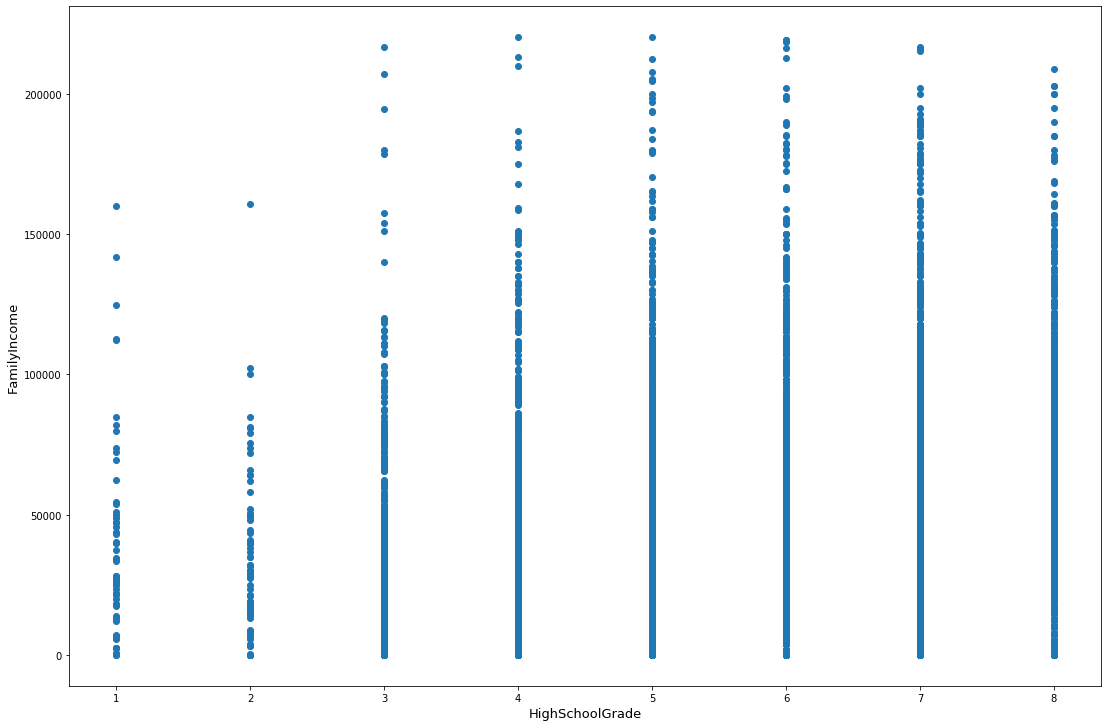

In [28]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 12.5)

ax.scatter(x = df.HighSchoolGrade, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('HighSchoolGrade', fontsize=13)
plt.show()
plt.close()

In [26]:
X=df.HighSchoolGrade.to_numpy().reshape(-1, 1)
y=df.FamilyIncome
print(X,y)

[[7.]
 [5.]
 [6.]
 ...
 [5.]
 [7.]
 [5.]] 0        50000
1        81000
2       150250
3        55000
4        14766
         ...  
5015     38000
5016     30441
5017     33500
5018     40400
5019     19643
Name: FamilyIncome, Length: 5020, dtype: int64


In [27]:
regressor = LinearRegression()  
regressor.fit(X, y)

print(regressor.intercept_)
print(regressor.score(X, y))

24517.79902389236
0.05124793888121382


**Let's visualize**

In [31]:
response=regressor.predict(X)

In [50]:
r2 = regressor.score(X, y)


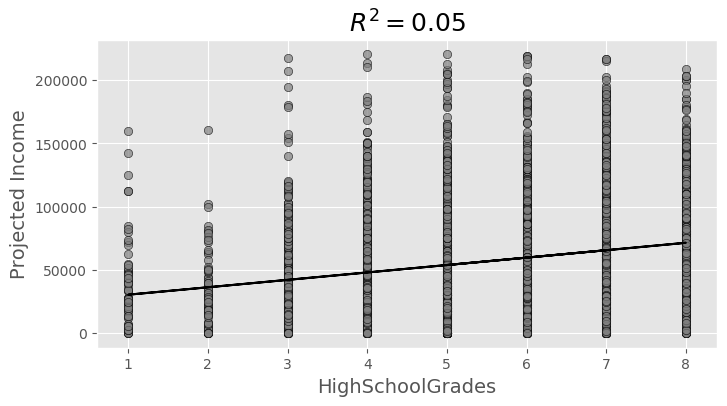

In [51]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Projected Income', fontsize=14)
ax.set_xlabel('HighSchoolGrades', fontsize=14)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

plt.show()
plt.close()

In [47]:
regressor.predict([[1]])

array([30374.99239404])

In [46]:
df.FamilyIncome[df.HighSchoolGrade==1].mean()

39802.3